In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load raw amplitude data

In [3]:
# Load train data
X_amp_train = np.load("data/Xtrain_amp.npy")
y_amp_train = np.load("data/ytrain_amp.npy")

In [4]:
# Load test data
X_amp_test = np.load("data/Xtest_amp.npy")
y_amp_test = np.load("data/ytest_amp.npy")

In [5]:
# Flatten
X_amp_train_flat = X_amp_train.reshape(X_amp_train.shape[0], -1)
X_amp_test_flat = X_amp_test.reshape(X_amp_test.shape[0], -1)

In [6]:
# Standardize
scaler_amp = StandardScaler()
scaler_amp.fit(X_amp_train_flat)

X_amp_train_standardized = scaler_amp.transform(X_amp_train_flat)
X_amp_test_standardized = scaler_amp.transform(X_amp_test_flat)

### Load Mel spectrogram data

In [6]:
# Load train data
X_mel_train = np.load("data/Xtrain_mel.npy")
y_mel_train = np.load("data/ytrain_mel.npy")

In [7]:
# Load test data
X_mel_test = np.load("data/Xtest_mel.npy")
y_mel_test = np.load("data/ytest_mel.npy")

In [8]:
# Flatten
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)

In [9]:
# Standardize
scaler_mel = StandardScaler()
scaler_mel.fit(X_mel_train_flat)

X_mel_train_standardized = scaler_mel.transform(X_mel_train_flat)
X_mel_test_standardized = scaler_mel.transform(X_mel_test_flat)

### Part A

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [12]:
pca_amp = PCA(n_components=500)
pca_amp.fit(X_amp_train_standardized)
X_amp_train_pca = pca_amp.transform(X_amp_train_standardized)
X_amp_test_pca = pca_amp.transform(X_amp_test_standardized)

In [42]:
lr_amp = LogisticRegression(random_state=0, solver='saga', max_iter=2000)
lr_amp.fit(X_amp_train_pca, y_amp_train)

print(f'Amp train accuracy: {lr_amp.score(X_amp_train_pca, y_amp_train)}')
print(f'Amp test accuracy: {lr_amp.score(X_amp_test_pca, y_amp_test)}')
y_preds = lr_amp.predict(X_amp_train_pca)
print(f'Amp train per-class accuracies: {confusion_matrix(y_amp_train, y_preds, normalize="true").diagonal()}')
y_preds = lr_amp.predict(X_amp_test_pca)
print(f'Amp test per-class accuracies: {confusion_matrix(y_amp_test, y_preds, normalize="true").diagonal()}')

Amp train accuracy: 0.36538807851611743
Amp test accuracy: 0.1952662721893491
Amp train per-class accuracies: [0.40857143 0.24873096 0.38936782 0.2332696  0.31301483 0.3925104
 0.56626506 0.4118541  0.36077844 0.38428571]
Amp test per-class accuracies: [0.25333333 0.05128205 0.47157191 0.05240175 0.14015152 0.17045455
 0.06666667 0.16101695 0.1059322  0.17      ]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [47]:
pca_mel = PCA(n_components=500)
pca_mel.fit(X_mel_train_standardized)
X_mel_train_pca = pca_mel.transform(X_mel_train_standardized)
X_mel_test_pca = pca_mel.transform(X_mel_test_standardized)

In [48]:
lr_mel = LogisticRegression(random_state=0, solver='saga', max_iter=2000)
lr_mel.fit(X_mel_train_pca, y_mel_train)

print(f'Mel train accuracy: {lr_mel.score(X_mel_train_pca, y_mel_train)}')
print(f'Mel test accuracy: {lr_mel.score(X_mel_test_pca, y_mel_test)}')
y_preds = lr_mel.predict(X_mel_train_pca)
print(f'Mel train per-class accuracies: {confusion_matrix(y_mel_train, y_preds, normalize="true").diagonal()}')
y_preds = lr_mel.predict(X_mel_test_pca)
print(f'Mel test per-class accuracies: {confusion_matrix(y_mel_test, y_preds, normalize="true").diagonal()}')

Mel train accuracy: 0.5793264901854853
Mel test accuracy: 0.3791533909877105
Mel train per-class accuracies: [0.52285714 0.56345178 0.83045977 0.47418738 0.66556837 0.47711512
 0.80722892 0.65045593 0.51047904 0.47142857]
Mel test per-class accuracies: [0.24333333 0.69230769 0.81939799 0.24017467 0.41287879 0.18181818
 0.4        0.3940678  0.44915254 0.21666667]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Part B

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_amp_train_standardized, y_amp_train)

print(f'MLP Amp train accuracy: {mlp.score(X_amp_train_standardized, y_amp_train)}')
print(f'MLP Amp test accuracy: {mlp.score(X_amp_test_standardized, y_amp_test)}')
y_preds = mlp.predict(X_amp_train_standardized)
print(f'MLP Amp train per-class accuracies: {confusion_matrix(y_amp_train, y_preds, normalize="true").diagonal()}')
y_preds = mlp.predict(X_amp_test_standardized)
print(f'MLP Amp test per-class accuracies: {confusion_matrix(y_amp_test, y_preds, normalize="true").diagonal()}')

MLP Amp train accuracy: 1.0
MLP Amp test accuracy: 0.1993627674101047
MLP Amp train per-class accuracies: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MLP Amp test per-class accuracies: [0.28       0.02564103 0.17056856 0.20524017 0.04924242 0.33333333
 0.06666667 0.01694915 0.43220339 0.15333333]


In [40]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_mel_train_standardized, y_mel_train)

print(f'MLP Mel train accuracy: {mlp.score(X_mel_train_standardized, y_mel_train)}')
print(f'MLP Mel test accuracy: {mlp.score(X_mel_test_standardized, y_mel_test)}')
y_preds = mlp.predict(X_mel_train_standardized)
print(f'MLP Mel train per-class accuracies: {confusion_matrix(y_mel_train, y_preds, normalize="true").diagonal()}')
y_preds = mlp.predict(X_mel_test_standardized)
print(f'MLP Mel test per-class accuracies: {confusion_matrix(y_mel_test, y_preds, normalize="true").diagonal()}')

MLP Mel train accuracy: 0.8573743922204214
MLP Mel test accuracy: 0.3705052344105599
MLP Mel train per-class accuracies: [0.99857143 0.92385787 0.69252874 0.78967495 0.93904448 0.76837725
 0.95180723 0.98024316 0.82185629 0.84      ]
MLP Mel test per-class accuracies: [0.45666667 0.53846154 0.19732441 0.19650655 0.46212121 0.34469697
 0.73333333 0.49576271 0.56355932 0.22333333]


In [43]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_amp_train_standardized, y_amp_train)

print(f'RF Amp train accuracy: {rf.score(X_amp_train_standardized, y_amp_train)}')
print(f'RF Amp test accuracy: {rf.score(X_amp_test_standardized, y_amp_test)}')
y_preds = rf.predict(X_amp_train_standardized)
print(f'RF Amp train per-class accuracies: {confusion_matrix(y_amp_train, y_preds, normalize="true").diagonal()}')
y_preds = rf.predict(X_amp_test_standardized)
print(f'RF Amp test per-class accuracies: {confusion_matrix(y_amp_test, y_preds, normalize="true").diagonal()}')

RF Amp train accuracy: 1.0
RF Amp test accuracy: 0.25534820209376424
RF Amp train per-class accuracies: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
RF Amp test per-class accuracies: [0.13666667 0.         0.55852843 0.27510917 0.24242424 0.36363636
 0.         0.27966102 0.07627119 0.15333333]


In [44]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_mel_train_standardized, y_mel_train)

print(f'RF Mel train accuracy: {rf.score(X_mel_train_standardized, y_mel_train)}')
print(f'RF Mel test accuracy: {rf.score(X_mel_test_standardized, y_mel_test)}')
y_preds = rf.predict(X_mel_train_standardized)
print(f'RF Mel train per-class accuracies: {confusion_matrix(y_mel_train, y_preds, normalize="true").diagonal()}')
y_preds = rf.predict(X_mel_test_standardized)
print(f'RF Mel test per-class accuracies: {confusion_matrix(y_mel_test, y_preds, normalize="true").diagonal()}')

RF Mel train accuracy: 1.0
RF Mel test accuracy: 0.4756486117432863
RF Mel train per-class accuracies: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
RF Mel test per-class accuracies: [0.33666667 0.23076923 0.54180602 0.4279476  0.56818182 0.45833333
 0.43333333 0.51694915 0.47033898 0.52666667]


In [45]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_amp_train_standardized, y_amp_train)

print(f'KNN Amp train accuracy: {knn.score(X_amp_train_standardized, y_amp_train)}')
print(f'KNN Amp test accuracy: {knn.score(X_amp_test_standardized, y_amp_test)}')
y_preds = knn.predict(X_amp_train_standardized)
print(f'KNN Amp train per-class accuracies: {confusion_matrix(y_amp_train, y_preds, normalize="true").diagonal()}')
y_preds = knn.predict(X_amp_test_standardized)
print(f'KNN Amp test per-class accuracies: {confusion_matrix(y_amp_test, y_preds, normalize="true").diagonal()}')

KNN Amp train accuracy: 0.1975508734017648
KNN Amp test accuracy: 0.16522530723714154
KNN Amp train per-class accuracies: [0.32142857 0.01522843 0.18678161 0.10133843 0.         0.18169209
 0.03614458 0.         0.81287425 0.01285714]
KNN Amp test per-class accuracies: [0.29       0.         0.06354515 0.069869   0.         0.09848485
 0.         0.         0.89830508 0.01      ]


In [46]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_mel_train_standardized, y_mel_train)

print(f'KNN Mel train accuracy: {knn.score(X_mel_train_standardized, y_mel_train)}')
print(f'KNN Mel test accuracy: {knn.score(X_mel_test_standardized, y_mel_test)}')
y_preds = knn.predict(X_mel_train_standardized)
print(f'KNN Mel train per-class accuracies: {confusion_matrix(y_mel_train, y_preds, normalize="true").diagonal()}')
y_preds = knn.predict(X_mel_test_standardized)
print(f'KNN Mel test per-class accuracies: {confusion_matrix(y_mel_test, y_preds, normalize="true").diagonal()}')

KNN Mel train accuracy: 0.5647397802989376
KNN Mel test accuracy: 0.3035958124715521
KNN Mel train per-class accuracies: [0.80285714 0.41116751 0.3591954  0.29445507 0.7199341  0.8668516
 0.4939759  0.72948328 0.58233533 0.16714286]
KNN Mel test per-class accuracies: [0.29333333 0.33333333 0.23076923 0.10917031 0.54924242 0.37878788
 0.43333333 0.34322034 0.48305085 0.06333333]


### Part C

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [62]:
lr_amp_hyperparams = dict(
    C=uniform(loc=0.5, scale=2),
    penalty=['l2', 'l1']
)
lr_amp = LogisticRegression(random_state=0, solver='saga', max_iter=200)
lr_amp_searcher = RandomizedSearchCV(lr_amp, lr_amp_hyperparams, n_iter=5, cv=5, return_train_score=True)
lr_amp_search = lr_amp_searcher.fit(X_amp_train_pca, y_amp_train)
lr_amp_search.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'C': 0.5978108278905419, 'penalty': 'l1'}

In [74]:
lr_amp_search.score(X_amp_test_pca, y_amp_test)

0.1943559399180701

In [89]:
lr_amp_search.cv_results_

{'mean_fit_time': array([52.54316225, 38.8340857 , 20.16063542, 37.22689791, 38.33438158]),
 'std_fit_time': array([9.36174318, 4.30572187, 1.0313742 , 0.63740236, 1.04631774]),
 'mean_score_time': array([0.00346603, 0.00265326, 0.00191956, 0.00197492, 0.00312834]),
 'std_score_time': array([0.00177002, 0.00160723, 0.0001996 , 0.00028399, 0.00133964]),
 'param_C': masked_array(data=[2.3797948648339897, 0.8114284842088801,
                    1.586781505231945, 1.9236351722635636,
                    0.5978108278905419],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l2', 'l1', 'l1'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 2.3797948648339897, 'penalty': 'l1'},
  {'C': 0.8114284842088801, 'penalty': 'l1'},
  {'C': 1.586781505231945, 'penalty': 'l2'},
  {'C': 1.9236351722635636, 'penalty': 'l1'

Text(0, 0.5, 'Mean Test Score')

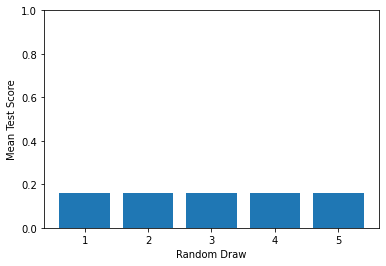

In [97]:
plt.bar(np.arange(1, 6), lr_amp_search.cv_results_['mean_test_score'])
plt.ylim(0.0, 1.0)
plt.xlabel('Random Draw')
plt.ylabel('Mean Test Score')

In [63]:
lr_mel_hyperparams = dict(
    C=uniform(loc=0.5, scale=2),
    penalty=['l2', 'l1']
)
lr_mel = LogisticRegression(random_state=0, solver='saga', max_iter=200)
lr_mel_searcher = RandomizedSearchCV(lr_mel, lr_mel_hyperparams, n_iter=5, cv=5, return_train_score=True)
lr_mel_search = lr_mel_searcher.fit(X_mel_train_pca, y_mel_train)
lr_mel_search.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'C': 0.9562415782163154, 'penalty': 'l1'}

In [75]:
lr_mel_search.score(X_mel_test_pca, y_mel_test)

0.3800637232589895

Text(0, 0.5, 'Mean Test Score')

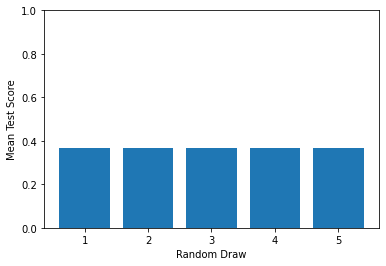

In [93]:
plt.bar(np.arange(1, 6), lr_mel_search.cv_results_['mean_test_score'])
plt.ylim(0.0, 1.0)
plt.xlabel('Random Draw')
plt.ylabel('Mean Test Score')

In [61]:
rf_amp_hyperparams = dict(
    n_estimators=np.linspace(64, 128, 64, dtype=int),
    max_depth=np.linspace(1, 32, 32, dtype=int)
)
rf_amp = RandomForestClassifier(random_state=0)
rf_amp_searcher = RandomizedSearchCV(rf_amp, rf_amp_hyperparams, n_iter=5, cv=5, return_train_score=True)
rf_amp_search = rf_amp_searcher.fit(X_amp_train_standardized, y_amp_train)
rf_amp_search.best_params_

{'n_estimators': 101, 'max_depth': 10}

In [76]:
rf_amp_search.score(X_amp_test_standardized, y_amp_test)

0.24533454710969504

Text(0, 0.5, 'Mean Test Score')

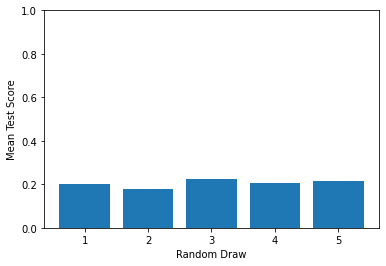

In [94]:
plt.bar(np.arange(1, 6), rf_amp_search.cv_results_['mean_test_score'])
plt.ylim(0.0, 1.0)
plt.xlabel('Random Draw')
plt.ylabel('Mean Test Score')

In [60]:
rf_mel_hyperparams = dict(
    n_estimators=np.linspace(64, 128, 64, dtype=int),
    max_depth=np.linspace(1, 32, 32, dtype=int)
)
rf_mel = RandomForestClassifier(random_state=0)
rf_mel_searcher = RandomizedSearchCV(rf_mel, rf_mel_hyperparams, n_iter=5, cv=5, return_train_score=True)
rf_mel_search = rf_mel_searcher.fit(X_mel_train_standardized, y_mel_train)
rf_mel_search.best_params_

{'n_estimators': 122, 'max_depth': 26}

In [78]:
rf_mel_search.score(X_mel_test_standardized, y_mel_test)

0.4829312699135184

Text(0, 0.5, 'Mean Test Score')

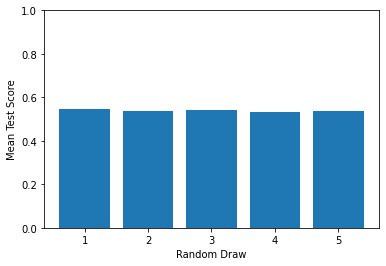

In [98]:
plt.bar(np.arange(1, 6), rf_mel_search.cv_results_['mean_test_score'])
plt.ylim(0.0, 1.0)
plt.xlabel('Random Draw')
plt.ylabel('Mean Test Score')

### Part D

In [7]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(X_amp_train_pca, y_amp_train)
ab.score(X_amp_test_pca, y_amp_test)

0.18525261720527994